In [92]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [93]:
env = gym.make("FrozenLake8x8-v1")

In [94]:
action_size = env.action_space.n
print("Action size: ", action_size)

state_size = env.observation_space.n
print("State size: ", state_size)

Action size:  4
State size:  64


In [95]:
qtable_history = []
score_history = []
qtable = np.zeros((state_size, action_size))

total_episodes = 250000       # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 400               # Max steps per episode
gamma = 0.9                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001            # Minimum exploration probability 
decay_rate = 0.00005             # Exponential decay rate for exploration prob

In [96]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    
    episode_count = episode + 1
    if episode_count % 10000 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(rewards)/episode_count)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.39594
[[7.38450777e-04 1.74549587e-03 3.40939163e-04 2.36687703e-04]
 [1.62407894e-04 6.58145152e-04 3.36186220e-03 2.78520271e-04]
 [8.65993291e-04 8.48201811e-04 5.10912807e-03 1.08615900e-03]
 [5.00106866e-04 2.16721679e-02 4.45275097e-04 1.24312481e-03]
 [1.40438748e-03 3.45905617e-04 7.59451900e-02 2.82433983e-04]
 [1.92381833e-03 3.34194536e-02 4.85477058e-04 5.92400798e-04]
 [2.45624967e-03 1.63541156e-03 3.77859600e-02 3.18109405e-03]
 [3.09200146e-02 3.39640948e-03 7.65255489e-04 3.31406292e-03]
 [1.96286954e-04 5.10415223e-04 2.16309720e-04 2.36384278e-03]
 [5.97338078e-04 7.94400493e-04 3.11014448e-04 1.10224591e-03]
 [5.67723389e-04 5.00034122e-03 6.74053096e-04 1.04186501e-03]
 [1.15219001e-04 7.98939494e-05 2.45936863e-04 1.55048157e-02]
 [1.38642175e-03 5.09844310e-04 2.12468566e-04 3.64771168e-02]
 [4.30453364e-04 3.94038520e-04 3.53199288e-02 1.90907884e-03]
 [2.62385731e-02 2.39990355e-03 3.98905114e-03 6.47182598e-04]
 [4.53080551e-03 1.81096073e-0

Score 0.0
Steps:  107
Score 0.0
Steps:  199
Score 0.0
Steps:  44
Score 1.0
Steps:  184
Score 0.0
Steps:  21
Score 1.0
Steps:  148
Score 0.0
Steps:  72
Score 1.0
Steps:  53
Score 1.0
Steps:  69
Score 0.0
Steps:  37
Score 0.0
Steps:  92
Score 0.0
Steps:  39
Score 0.0
Steps:  34
Score 1.0
Steps:  94
Score 0.0
Steps:  199
Score 0.0
Steps:  199
Score 0.0
Steps:  58
Score 1.0
Steps:  38
Score 1.0
Steps:  176
Score 1.0
Steps:  58
Score 1.0
Steps:  81
Score 1.0
Steps:  184
Score 0.0
Steps:  14
Score 0.0
Steps:  47
Score 0.0
Steps:  88
Score 1.0
Steps:  168
Score 0.0
Steps:  161
Score 0.0
Steps:  14
Score 1.0
Steps:  47
Score 0.0
Steps:  24
Score 1.0
Steps:  46
Score 1.0
Steps:  57
Score 1.0
Steps:  68
Score 1.0
Steps:  98
Score 1.0
Steps:  69
Score 0.0
Steps:  45
Score 0.0
Steps:  28
Score 0.0
Steps:  66
Score 0.0
Steps:  59
Score 1.0
Steps:  164
Score 0.0
Steps:  74
Score 0.0
Steps:  6
Score 0.0
Steps:  67
Score 1.0
Steps:  134
Score 0.0
Steps:  21
Score 0.0
Steps:  103
Score 1.0
Steps:  158


Text(0.5, 1.0, 'Score vs. number of episodes')

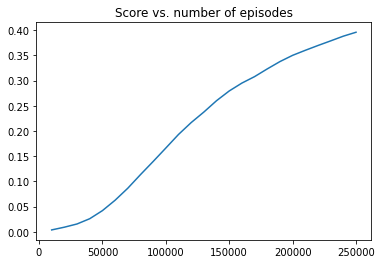

In [97]:
env.reset()
total_test_episodes = 1000
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        # env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            print ("Score", total_rewards)
            print("Steps: ", step)
            break
        state = new_state
env.close()

# Plotting score over time
plt.plot(list(range(0, 250000+1, 10000))[1:], score_history)
plt.title("Score vs. number of episodes")

In [98]:
'''for episode in range(3):
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)

        action = np.argmax(q_table[state,:])
        new_state, reward, done, info = env.step(action)

        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole :(****")
                time.sleep(3)
            clear_output(wait=True)
            break

        state = new_state

env.close()'''

'for episode in range(3):\n    state = env.reset()\n    done = False\n    print("*****EPISODE ", episode+1, "*****\n\n\n\n")\n    time.sleep(1)\n\n    for step in range(max_steps_per_episode):\n        clear_output(wait=True)\n        env.render()\n        time.sleep(0.3)\n\n        action = np.argmax(q_table[state,:])\n        new_state, reward, done, info = env.step(action)\n\n        if done:\n            clear_output(wait=True)\n            env.render()\n            if reward == 1:\n                print("****You reached the goal!****")\n                time.sleep(3)\n            else:\n                print("****You fell through a hole :(****")\n                time.sleep(3)\n            clear_output(wait=True)\n            break\n\n        state = new_state\n\nenv.close()'